# 图像补全

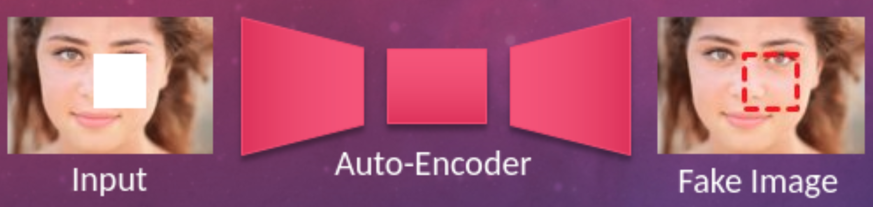

## 实现一个17层的网络

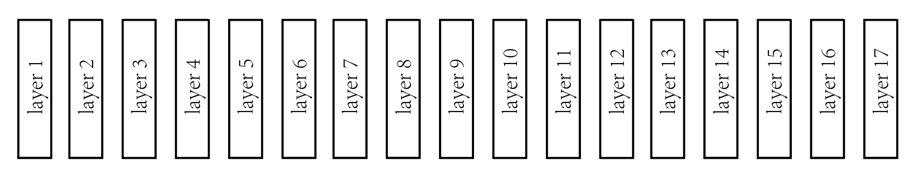

## 首先实现layer1到layer12

layer1到layer12都是由conv + relu + bn组成

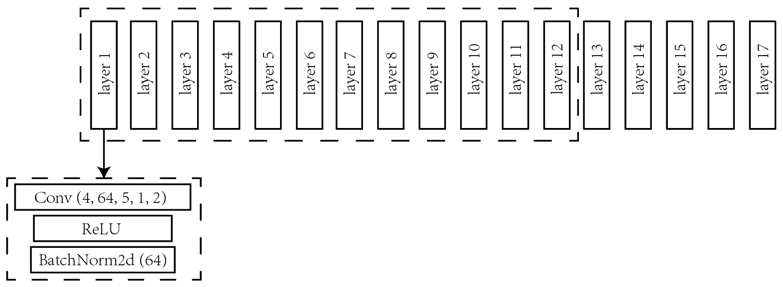

### 定义operators

``` python
from torch import nn

class CompletionNetwork(nn.Module):
    def __init__(self):
        super(CompletionNetwork, self).__init__()
        
        # define operators
        
        # layer1, input_shape: (None, 4, img_h, img_w)
        self.conv1 = nn.Conv2d(4, 64, kernel_size=5, stride=1, padding=2)
        self.act1 = nn.ReLU()
        self.bn1 = nn.BatchNorm2d(64)
        
        # layer2, input_shape: (None, 64, img_h, img_w)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1)
        self.act2 = nn.ReLU()
        self.bn2 = nn.BatchNorm2d(128)
        
        # layer3, input_shape: (None, 128, img_h//2, img_w//2)
        self.conv3 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.act3 = nn.ReLU()
        self.bn3 = nn.BatchNorm2d(128)
        
        # layer4, input_shape: (None, 128, img_h//2, img_w//2)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1)
        self.act4 = nn.ReLU()
        self.bn4 = nn.BatchNorm2d(256)
        
        # layer5, input_shape: (None, 256, img_h//4, img_w//4)
        self.conv5 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.act5 = nn.ReLU()
        self.bn5 = nn.BatchNorm2d(256)
        
        # layer6, input_shape: (None, 256, img_h//4, img_w//4)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.act6 = nn.ReLU()
        self.bn6 = nn.BatchNorm2d(256)
        
        # layer7, input_shape: (None, 256, img_h//4, img_w//4)
        self.conv7 = nn.Conv2d(256, 256, kernel_size=3, stride=1, dilation=2, padding=2)
        self.act7 = nn.ReLU()
        self.bn7 = nn.BatchNorm2d(256)
        
        # layer8, input_shape: (None, 256, img_h//4, img_w//4)
        self.conv8 = nn.Conv2d(256, 256, kernel_size=3, stride=1, dilation=4, padding=4)
        self.act8 = nn.ReLU()
        self.bn8 = nn.BatchNorm2d(256)
        
        # layer9, input_shape: (None, 256, img_h//4, img_w//4)
        self.conv9 = nn.Conv2d(256, 256, kernel_size=3, stride=1, dilation=8, padding=8)
        self.act9 = nn.ReLU()
        self.bn9 = nn.BatchNorm2d(256)
        
        # layer10, input_shape: (None, 256, img_h//4, img_w//4)
        self.conv10 = nn.Conv2d(256, 256, kernel_size=3, stride=1, dilation=16, padding=16)
        self.act10 = nn.ReLU()
        self.bn10 = nn.BatchNorm2d(256)
        
        # layer11, input_shape: (None, 256, img_h//4, img_w//4)
        self.conv11 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.act11 = nn.ReLU()
        self.bn11 = nn.BatchNorm2d(256)
        
        # layer12, input_shape: (None, 256, img_h//4, img_w//4)
        self.conv12 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.act12 = nn.ReLU()
        self.bn12 = nn.BatchNorm2d(256)
```

### 定义operations
``` python
from torch import nn

class CompletionNetwork(nn.Module):
    def __init__(self):
        super(CompletionNetwork, self).__init__()
        
        # define operators
        # ...
        
    def forward(self, image):
        # define operations
        
        # image, input_shape: (None, 4, img_h, img_w)
        x = self.bn1(self.act1(self.conv1(image)))
        x = self.bn2(self.act2(self.conv2(x)))
        x = self.bn3(self.act3(self.conv3(x)))
        x = self.bn4(self.act4(self.conv4(x)))
        x = self.bn5(self.act5(self.conv5(x)))
        x = self.bn6(self.act6(self.conv6(x)))
        x = self.bn7(self.act7(self.conv7(x)))
        x = self.bn8(self.act8(self.conv8(x)))
        x = self.bn9(self.act9(self.conv9(x)))
        x = self.bn10(self.act10(self.conv10(x)))
        x = self.bn11(self.act11(self.conv11(x)))
        x = self.bn12(self.act12(self.conv12(x)))
```


## 首先实现layer13到layer17

layer13到layer17也是由conv + relu + bn组成

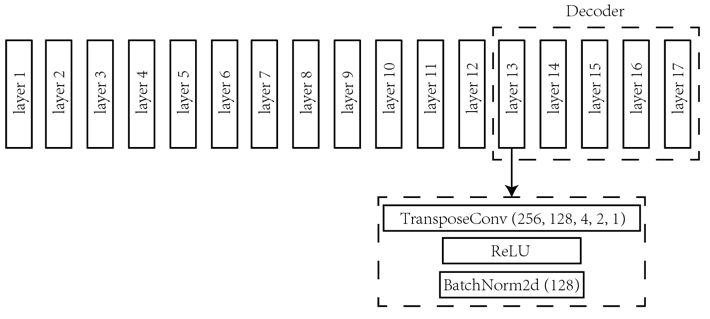

``` python
from torch import nn

class CompletionNetwork(nn.Module):
    def __init__(self):
        super(CompletionNetwork, self).__init__()
        
        # define operators
        
        # layer 1 to layer 12
        # ...
        
        # layer13, input_shape: (None, 256, img_h//4, img_w//4)
        self.deconv13 = nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1)
        self.act13 = nn.ReLU()
        self.bn13 = nn.BatchNorm2d(128)
        
        # layer14, input_shape: (None, 128, img_h//2, img_w//2)
        self.conv14 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.act14 = nn.ReLU()
        self.bn14 = nn.BatchNorm2d(128)
        
        # layer15, input_shape: (None, 128, img_h//2, img_w//2)
        self.deconv15 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1)
        self.act15 = nn.ReLU()
        self.bn15 = nn.BatchNorm2d(64)
        
        # layer16, input_shape: (None, 64, img_h, img_w)
        self.conv16 = nn.Conv2d(64, 32, kernel_size=3, stride=1, padding=1)
        self.act16 = nn.ReLU()
        self.bn16 = nn.BatchNorm2d(32)
        
        # layer17, input_shape: (None, 32, img_h, img_w)
        self.conv17 = nn.Conv2d(32, 3, kernel_size=3, stride=1, padding=1)
        self.act17 = nn.Sigmoid()
        # output_shape: (None, 3, img_h. img_w)
```

### 定义operations
``` python
from torch import nn

class CompletionNetwork(nn.Module):
    def __init__(self):
        super(CompletionNetwork, self).__init__()
        
        # define operators
        # ...
        
    def forward(self, image):
        # define operations
        
        # image, input_shape: (None, 4, img_h, img_w)
        # layer 1 to layer 12 operations
        
        x = self.bn13(self.act13(self.deconv13(x)))
        x = self.bn14(self.act14(self.conv14(x)))
        x = self.bn15(self.act15(self.deconv15(x)))
        x = self.bn16(self.act16(self.conv16(x)))
        x = self.act17(self.conv17(x))
        return x
```

In [ ]:
from demo import demo

In [4]:
demo()